In [14]:
import os
import csv
import matplotlib.pyplot as plt
import numpy as np

In [18]:
animal_name='JC315'
date='20240406'

basedir = "/mnt/adata11/"
mbasedir="/adata_pool/merged/"+animal_name+'-'+date+'/'

basename = animal_name+'-'+date

In [19]:
session_metadata = {}
with open('session_metadata.csv', mode='r', encoding='utf-8') as file:
    reader = csv.DictReader(file, delimiter=";")    
    for line in reader:
        session_id = line.pop('session_id')
        session_metadata[session_id] = line
        
print('Metadata for',basename)
session_metadata[basename]

Metadata for JC315-20240406


{'num_tetr': '32',
 'last_pfc_left': '8',
 'last_pfc_right': '16',
 'session_names': "['presleep','training1','intersleep','training2','postsleep']",
 'session_idx': '[[1],[2],[3,4,5],[6],[7]]',
 'reward_arms': '7,2',
 'rewards': 'C,S'}

In [20]:
sample_rate_res_old=24000
sample_rate_res=20000
sample_rate_eeg=1250
downsampled_res=sample_rate_res/sample_rate_res_old
num_tetrodes = int(session_metadata[basename]['num_tetr'])
num_channels = 128

In [21]:
def find_files_with_eeg(directory):
    eeg_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.eeg'):
                eeg_files.append(os.path.join(root, file))
                
    return eeg_files

In [22]:
eeg_files=sorted(find_files_with_eeg(mbasedir))

In [27]:
eeg_merged=np.fromfile(eeg_files[0], dtype=np.int16)
print('Reshaping',eeg_files[0],'from length',eeg_merged.shape)
eeg_merged= eeg_merged.reshape(int(len(eeg_merged)/num_channels),num_channels)
print('New eeg_merged shape:',eeg_merged.shape)

Reshaping /adata_pool/merged/JC315-20240406/JC315-20240406_intersleep.eeg from length (573687936,)
New eeg_merged shape: (4481937, 128)


In [26]:
eeg=np.fromfile(eeg_files[0], dtype=np.int16)

In [29]:
eeg_merged

array([[  -362,  -1102,  -1669, ...,  -1973,  -2026,  -2161],
       [  -213,   -963,  -1431, ...,  -1917,  -1984,  -2105],
       [  -257,   -754,  -1273, ...,  -2033,  -2161,  -2173],
       ...,
       [-18712,  -4554,  -2006, ...,  -2919,  -2845,  -3157],
       [-18693,  -4354,  -1703, ...,  -3284,  -3204,  -3456],
       [-18404,  -4021,  -1196, ...,  -3010,  -3019,  -3205]], dtype=int16)

In [9]:
# load the session timestamps and downsample them
session_timestamps=np.loadtxt(basedir+"processing/"+animal_name+'/'+date+'/'+'session_shifts.txt')

session_timestamps=np.append([0],session_timestamps) # start the first timestamp at 0
session_timestamps_down=session_timestamps*downsampled_res
print('Resampled session timestamps:',session_timestamps)

Resampled session timestamps: [0.00000000e+00 8.64001470e+07 1.40659944e+08 1.86045741e+08
 1.87050888e+08 2.26713135e+08 2.78998632e+08 3.65398779e+08]


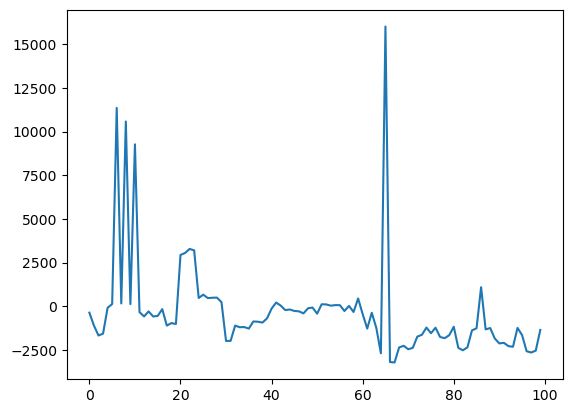

In [10]:
plt.plot(eeg[4078410])